# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [ ]:
dados = pd.read_csv("dados.csv")

### Visualize o conteúdo do DataFrame

In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [ ]:
dados.Renda.min()


0

In [ ]:
dados.Renda.max()

200000

In [ ]:
classes = [0,1576,3940,11820,19700,200000]

### 2º Definir os labels das classes

In [ ]:
labels = ['E','D','C','B','A']

### 3º Construir a coluna de frequências

In [ ]:
frequencia = pd.value_counts(
    pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True)
)

frequencia

E    27040
D     5755
C     2215
B      189
A       99
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [ ]:
percentual = pd.value_counts(
    pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True), normalize = True) *100

percentual

E    76.761483
D    16.337364
C     6.287969
B     0.536536
A     0.076648
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [ ]:
dist_freq_quantitativas_personalizadas = pd.DataFrame({'Frequencia':frequencia, 'Porcentagem (%)':percentual})
dist_freq_quantitativas_personalizadas

,Frequencia,Porcentagem (%)
E,27040,76.761483
D,5755,16.337364
C,2215,6.287969
B,189,0.536536
A,27,0.076648


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<Axes: >

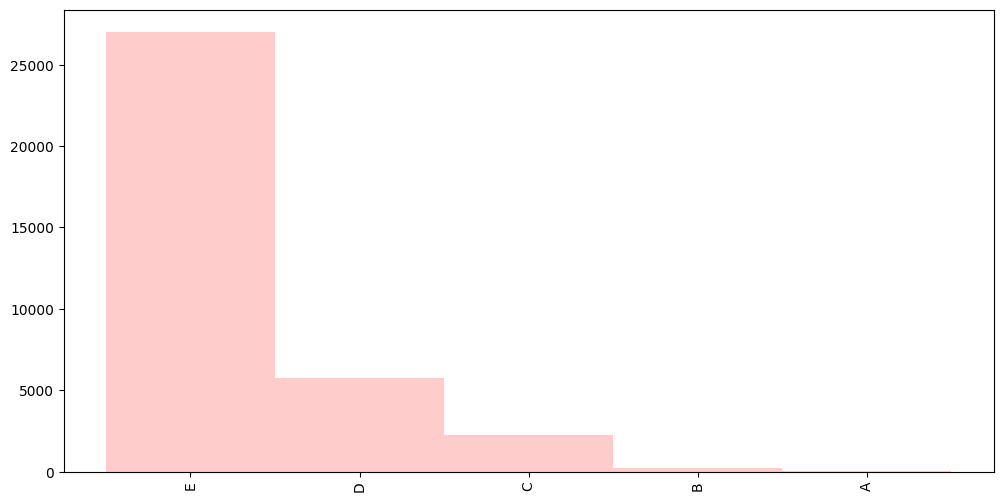

In [ ]:
dist_freq_quantitativas_personalizadas['Frequencia'].plot.bar(width=1,color="red",alpha = 0.2,figsize=(12,6))

> ### Conclusões

Maioria dos salários se concentra na Classe E


### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

(12.915000000000001, 17.941]      39
(17.941, 22.882]                 872
(22.882, 27.824]                2350
(27.824, 32.765]                3994
(32.765, 37.706]                5078
(37.706, 42.647]                4945
(42.647, 47.588]                4724
(47.588, 52.529]                4517
(52.529, 57.471]                3577
(57.471, 62.412]                2458
(62.412, 67.353]                1449
(67.353, 72.294]                 690
(72.294, 77.235]                 370
(77.235, 82.176]                 160
(82.176, 87.118]                  50
(87.118, 92.059]                  23
(92.059, 97.0]                     2
Name: Idade, dtype: int64

<ipython-input-80-bc7e12a6d173>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Idade, kde = False)


<Axes: title={'center': 'distribuição frequencia - Idade'}, xlabel='Idade'>

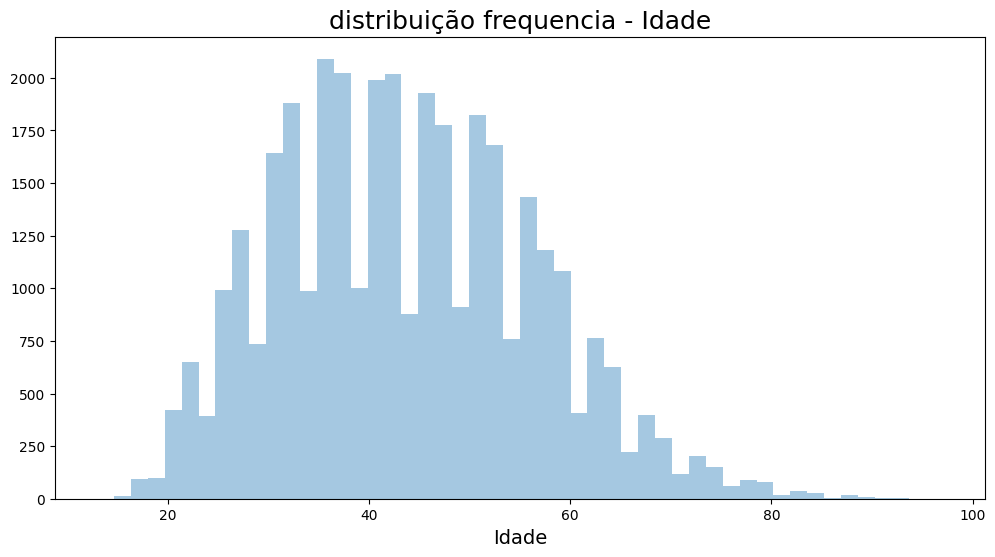

In [ ]:
ax = sns.distplot(dados.Idade, kde = False)

ax.figure.set_size_inches(12,6)
ax.set_title("distribuição frequencia - Idade", fontsize = 18)
ax.set_xlabel("Idade", fontsize = 14)
ax

<Axes: title={'center': 'distribuição frequencia - altura'}, xlabel='Metros', ylabel='Count'>

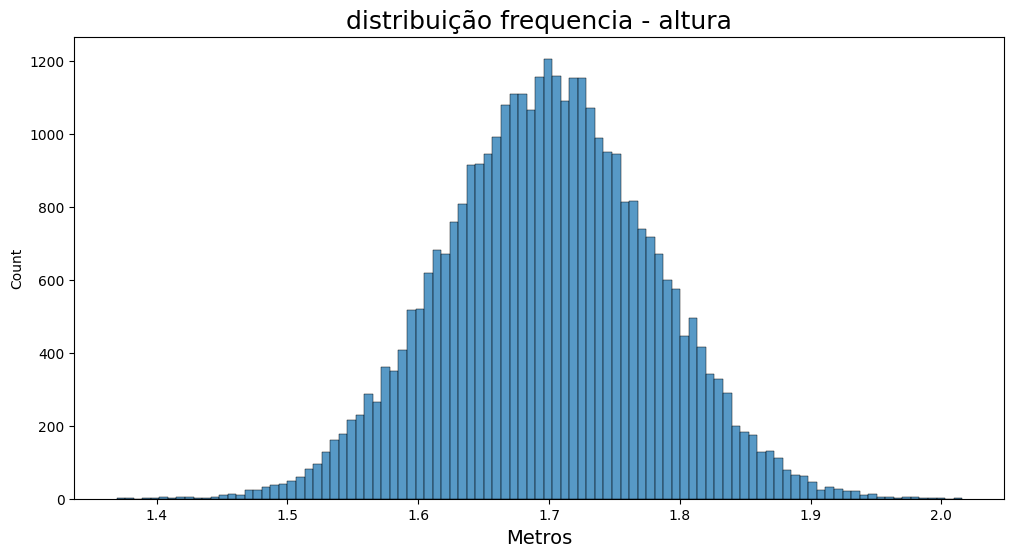

In [ ]:
ax = sns.histplot(dados.Altura, kde = False)

ax.figure.set_size_inches(12,6)
ax.set_title("distribuição frequencia - altura", fontsize = 18)
ax.set_xlabel("Metros", fontsize = 14)
ax

> ### Conclusões

Escreva suas conclusões aqui...

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

<ipython-input-79-3c0e844db831>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.query('Renda <20000')['Renda'])


<Axes: title={'center': 'Renda'}, xlabel='Renda', ylabel='Density'>

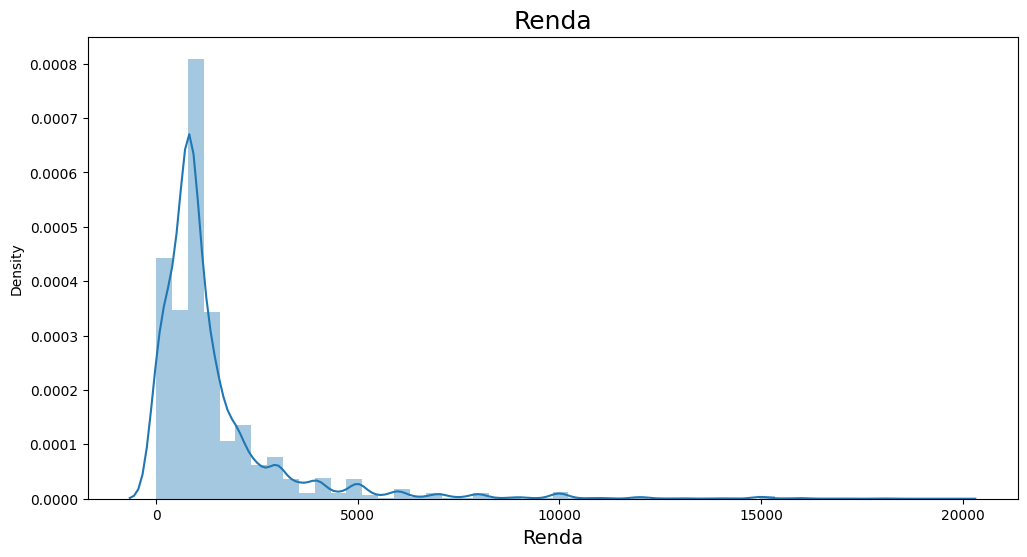

In [ ]:
ax = sns.distplot(dados.query('Renda <20000')['Renda'])

ax.figure.set_size_inches(12,6)
ax.set_title("Renda", fontsize = 18)
ax.set_xlabel("Renda", fontsize = 14)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [ ]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [ ]:
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)

frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,187,6039,3008,41,15101
Feminino,61,2602,1566,38,6655


In [ ]:
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor, normalize = True )* 100
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)

percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.529775,17.108618,8.521729,0.116154,42.781461
Feminino,0.172814,7.371522,4.436512,0.107655,18.853759


> ### Conclusões

Escreva suas conclusões aqui...

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [ ]:
dados.Renda.mean()

1486.3392543486882

### Obtenha a mediana

In [ ]:
dados.Renda.median()

860.0

### Obtenha a moda

In [ ]:
dados.Renda.mode()

0    788
Name: Renda, dtype: int64

### Obtenha o desvio médio absoluto

In [ ]:
dados.Renda.mad()

2561.8913417688736

### Obtenha a variância

In [ ]:
dados.Renda.var()

6563287.247030319

### Obtenha o desvio-padrão

In [ ]:
dados.Renda.std()

2561.8913417688736

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [ ]:
teste = pd.crosstab(dados.Sexo,
                         dados.Cor, aggfunc={'mean','median','max'}, values = dados.Renda)
teste.rename(columns = cor, inplace = True)
teste.rename(index = sexo, inplace = True)
teste

max                                       mean               \
Cor       Indígena  Branca  Preta Amarela   Parda    Indígena       Branca   
Sexo                                                                         
Masculino    10000  200000  50000   50000  100000  891.529412  2246.350058   
Feminino      5500   30000  18000    8000   30000  825.098361  1764.718294   

                                                   median                 \
Cor              Preta      Amarela        Parda Indígena  Branca  Preta   
Sexo                                                                       
Masculino  1337.413231  4303.951220  1410.447719    788.0  1200.0  980.0   
Feminino    966.537676  1327.052632  1055.995943    788.0   850.0  788.0   

                          
Cor       Amarela  Parda  
Sexo                      
Masculino  1400.0  900.0  
Feminino    925.0  788.0

> ### Conclusões

very hard, parceiro.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [ ]:
teste = pd.crosstab(dados.Sexo,
                         dados.Cor, aggfunc={'std','var'}, values = dados.Renda)
teste.rename(index = sexo, inplace = True)
teste.rename(columns = cor, inplace = True)

teste

std                                                      \
Cor           Indígena       Branca        Preta      Amarela        Parda   
Sexo                                                                         
Masculino  1181.516796  4284.820241  1754.210876  8354.521584  2084.366594   
Feminino   1001.885235  2742.388712  1136.135645  1588.740296  1513.736790   

                    var                                            \
Cor            Indígena        Branca         Preta       Amarela   
Sexo                                                                
Masculino  1.395982e+06  1.835968e+07  3.077256e+06  6.979803e+07   
Feminino   1.003774e+06  7.520696e+06  1.290804e+06  2.524096e+06   

                         
Cor               Parda  
Sexo                     
Masculino  4.344584e+06  
Feminino   2.291399e+06

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: title={'center': 'Anos de estudo'}, xlabel='Anos', ylabel='Sexo'>

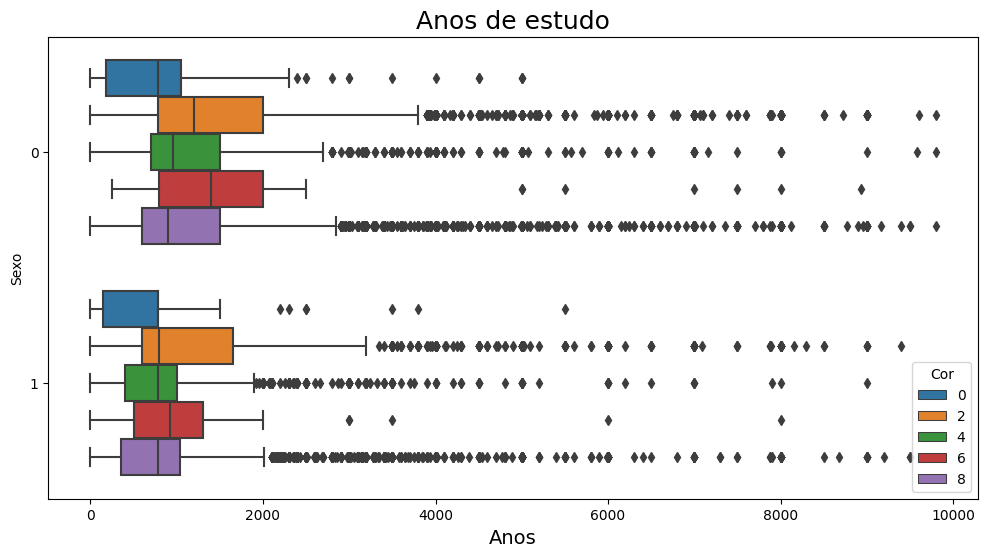

In [ ]:
ax = sns.boxplot(x='Renda', y = 'Sexo', hue = 'Cor',data = dados.query('Renda < 10000'),orient = 'h')

ax.figure.set_size_inches(12,6)
ax.set_title("Anos de estudo", fontsize = 18)
ax.set_xlabel("Anos", fontsize = 14)
ax

> ### Conclusões

Escreva suas conclusões aqui...